By Mohit

# Introduction
Nowadays, an increasing number of people earn money by stocks investment. Generally, we need to consult professionals to recognize values and trends of stocks to help people to manage ther stocks. The purpose of this file is to regression modelling using machine learning algorithms and using hostoric data of Japanese stocks and options to predict the future earnings.

# Data Wrangling
### Importing



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Read csv file and creat DataFrame

In [ ]:
# permit colab to read files of Google Drive
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
stock_list = pd.read_csv('/content/drive/My Drive/Colab Notebooks/jpx-tokyo-stock-exchange-prediction/stock_list.csv')
financials = pd.read_csv('/content/drive/My Drive/Colab Notebooks/jpx-tokyo-stock-exchange-prediction/train_files/financials.csv')
options = pd.read_csv('/content/drive/My Drive/Colab Notebooks/jpx-tokyo-stock-exchange-prediction/train_files/options.csv')
sec_stock_prices = pd.read_csv('/content/drive/My Drive/Colab Notebooks/jpx-tokyo-stock-exchange-prediction/train_files/secondary_stock_prices.csv')
stock_prices = pd.read_csv('/content/drive/My Drive/Colab Notebooks/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')
trades = pd.read_csv('/content/drive/My Drive/Colab Notebooks/jpx-tokyo-stock-exchange-prediction/train_files/trades.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
stock_list

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,9994,20211230,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2,20211230.0,2447.0,1.084787e+07,2.654474e+10,True
4413,9995,20211230,"GLOSEL Co.,Ltd.",First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2,20211230.0,410.0,2.642680e+07,1.083499e+10,False
4414,9996,20211230,"Satoh&Co.,Ltd.",JASDAQ(Standard / Domestic),Standard Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,-,-,20211230.0,1488.0,9.152640e+06,1.361913e+10,False
4415,9997,20211230,"BELLUNA CO.,LTD.",First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,6,TOPIX Small 1,20211230.0,709.0,9.724447e+07,6.894633e+10,True


In [ ]:
financials

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.017010e+13,20170105_2659,2017-01-05,2659.0,2017-01-05,15:00:00,1.483596e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,285.05,NaN,False,True,False,False,False,31981654.0,18257,31963405.0
4,2.017011e+13,20170105_3050,2017-01-05,3050.0,2017-01-05,15:30:00,1.483598e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92951,2.021112e+13,20211203_6040,2021-12-03,6040.0,2021-12-03,15:00:00,1.638511e+09,1QFinancialStatements_Consolidated_JP,2021-10-31,1Q,...,－,NaN,False,True,False,False,False,16000400.0,836400,15164000.0
92952,2.021120e+13,20211203_6898,2021-12-03,6898.0,2021-12-03,16:00:00,1.638515e+09,3QFinancialStatements_Consolidated_JP,2021-10-31,3Q,...,142.01,NaN,False,False,False,False,False,816979.0,157541,659486.0
92953,2.021120e+13,20211203_6969,2021-12-03,6969.0,2021-12-03,15:00:00,1.638511e+09,ForecastRevision,2022-03-31,FY,...,-147.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92954,2.021112e+13,20211203_8057,2021-12-03,8057.0,2021-12-03,17:00:00,1.638518e+09,1QFinancialStatements_Consolidated_JP,2021-10-20,1Q,...,330.92,NaN,False,True,False,False,False,10419371.0,614032,9805339.0


In [ ]:
options

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.47360,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.47360,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.47360,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.47360,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.47360,14.5932,0.0091,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567689,20211203_199244018,2021-12-03,199244018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,335.0,368.5305,24.70275,19.2442,0.1564,0.0,0.0
3567690,20211203_199245018,2021-12-03,199245018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,1160.0,1253.3703,24.70275,19.0517,0.1564,0.0,0.0
3567691,20211203_199246018,2021-12-03,199246018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,1015.0,1097.0436,24.70275,19.0956,0.1564,0.0,0.0
3567692,20211203_199247018,2021-12-03,199247018,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,2,20241212,20241213,885.0,959.3328,24.70275,19.1168,0.1564,0.0,0.0


In [ ]:
sec_stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1305,2017-01-04,1305,1594.0,1618.0,1594.0,1615.0,538190,1.0,NaN,False,-0.001855
1,20170104_1306,2017-01-04,1306,1575.0,1595.0,1573.0,1593.0,2494980,1.0,NaN,False,-0.000627
2,20170104_1308,2017-01-04,1308,1557.0,1580.0,1557.0,1578.0,526100,1.0,NaN,False,-0.001900
3,20170104_1309,2017-01-04,1309,28810.0,29000.0,28520.0,28780.0,403,1.0,NaN,False,0.005237
4,20170104_1311,2017-01-04,1311,717.0,735.0,717.0,734.0,5470,1.0,NaN,False,0.001359
...,...,...,...,...,...,...,...,...,...,...,...,...
2384570,20211203_9980,2021-12-03,9980,129.0,131.0,129.0,130.0,44400,1.0,NaN,False,0.007692
2384571,20211203_9986,2021-12-03,9986,1900.0,1900.0,1891.0,1896.0,3800,1.0,NaN,False,0.004213
2384572,20211203_9995,2021-12-03,9995,390.0,395.0,388.0,394.0,43400,1.0,NaN,False,0.030534
2384573,20211203_9996,2021-12-03,9996,1490.0,1500.0,1490.0,1500.0,500,1.0,NaN,False,0.022150


In [ ]:
stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [ ]:
trades

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,2021-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1708,2021-12-02,2021-11-22,2021-11-26,Growth Market (Mothers/JASDAQ),1.143466e+09,1.143923e+09,2.287389e+09,456677.0,3.663919e+07,3.496068e+07,...,396230.0,-275608.0,6696755.0,6886122.0,13582877.0,189367.0,234653.0,298525.0,533178.0,63872.0
1709,2021-12-02,2021-11-22,2021-11-26,Prime Market (First Section),1.138343e+10,1.137621e+10,2.275964e+10,-7214179.0,1.499660e+09,1.230944e+09,...,35957940.0,-17510292.0,254580089.0,261919512.0,516499601.0,7339423.0,11959898.0,16368287.0,28328185.0,4408389.0
1710,2021-12-02,2021-11-22,2021-11-26,Standard Market (Second Section),1.069969e+08,1.075036e+08,2.145004e+08,506702.0,2.811025e+06,3.273163e+06,...,42127.0,-42127.0,438928.0,243817.0,682745.0,-195111.0,60291.0,6985.0,67276.0,-53306.0


In [ ]:
# delete the columns that is unrelated with Target column
stock_prices = stock_prices.drop(columns=['RowId', 'Date', 'SupervisionFlag', 'ExpectedDividend','ExpectedDividend'])
stock_prices

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,Target
0,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.000730
1,1332,568.0,576.0,563.0,571.0,2798500,1.0,0.012324
2,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,0.006154
3,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,0.011053
4,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,0.003026
...,...,...,...,...,...,...,...,...
2332526,9990,514.0,528.0,513.0,528.0,44200,1.0,0.034816
2332527,9991,782.0,794.0,782.0,794.0,35900,1.0,0.025478
2332528,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,-0.004302
2332529,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,0.009098


In [ ]:
# Check if there are NaN 
check_is_null = stock_prices.isnull().values.any()
print (check_is_null)

True


In [ ]:
# delete all rows that contains NaN
stock_prices = stock_prices.dropna(axis=0, how='any')
stock_prices

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,Target
0,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.000730
1,1332,568.0,576.0,563.0,571.0,2798500,1.0,0.012324
2,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,0.006154
3,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,0.011053
4,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,0.003026
...,...,...,...,...,...,...,...,...
2332526,9990,514.0,528.0,513.0,528.0,44200,1.0,0.034816
2332527,9991,782.0,794.0,782.0,794.0,35900,1.0,0.025478
2332528,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,-0.004302
2332529,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,0.009098


# EDA
## stock_list
The data stock_list contains the inforamtion of different companies, including SecuratiesCode, names and industries that companies is in. 

So we visualze the variable 33SectorCode to show the industry distribution.


Text(0, 0.5, 'Total number observations of each code')

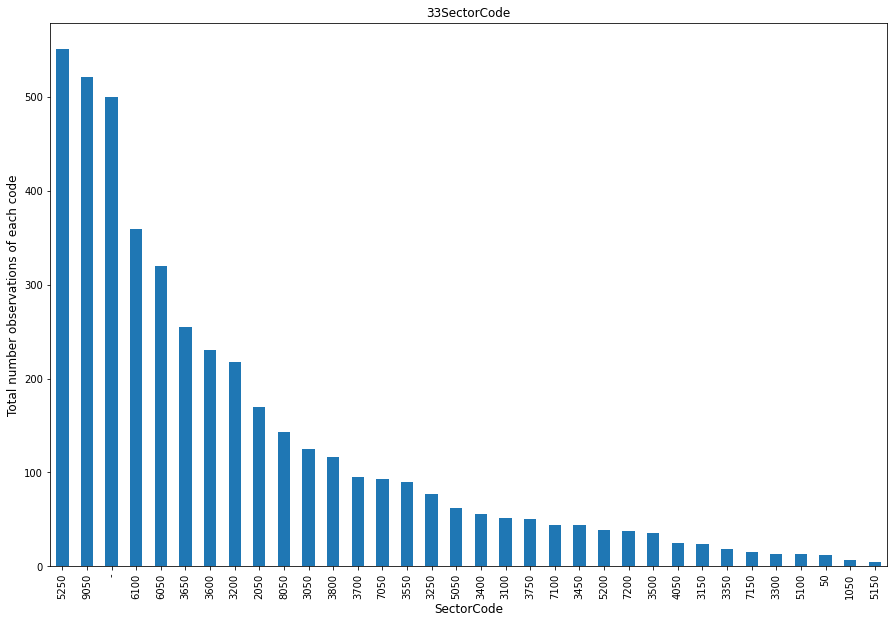

In [ ]:
x = stock_list['33SectorCode'].value_counts().plot(kind='bar', title='33SectorCode', figsize=(15, 10), fontsize=10)
x.set_xlabel('SectorCode', fontsize=12)
x.set_ylabel('Total number observations of each code', fontsize=12)

As we can see the most number of 33SectoreCode is 5250 which represents the Information&Communication industries. And second most number of 33SectoreCode is 9050 which represents the services industris. The least number of 33SectorCode is 5150 which represents the Air Transportation industries. 

According the output below, there are 4411 companies in the dataset. Therefore, most of thee companies are belong to Information&Communication and services industries.

In [ ]:
len(stock_list['Name'].unique())

4411

## financials
The data financials contain the information of earnings. In this part, wy wil analysis and visualize the earnings of different quarter.

Since there are many companies in the dataset, we choose two companies as examples.


In [ ]:
sub_financials = financials.loc[financials['SecuritiesCode']==4575.0] # x = 'TypeOfCurrentPeriod', y = ['NetSales', 'OperatingProfit','OrdinaryProfit','Profit','OrdinaryProfit','TotalAssets', 'Equity', 'EquityToAssetRatio', 'BookValuePerShar'])
#x = sub_financials['TypeOfCurrentPeriod']
#y1 = sub_financials['NetSales']
#y2 = sub_financials['OperatingProfit']
#plt.figure()
#plt.plot(x,y1,'r')
#plt.plot(x,y2,'b')
#plt.show()
sub_financials['NetSales']

2              NaN
3449      55000000
7682      82000000
12715    109000000
17678     27000000
21850     55000000
26638     82000000
26639     82000000
31547    110000000
35803     33000000
36602          NaN
39635     61000000
44480     88000000
49521    115000000
53651     27000000
54560          NaN
54570          NaN
55453          NaN
57813     55000000
61888     82000000
67678    110000000
73250     27000000
77595     55000000
82639     82000000
87728    108000000
91745            －
Name: NetSales, dtype: object

# KNN 

In [ ]:
# normalization
# import module to standardize the scale
from sklearn import preprocessing
# Fit the object to all the data expected the Target Class
std_scale = preprocessing.StandardScaler().fit(stock_prices.drop('Target', axis=1))
# Use scaler object to conduct a transform
df_std = std_scale.transform(stock_prices.drop('Target', axis=1))

df_std

array([[-1.91182569,  0.03899406,  0.03549253, ...,  0.04137425,
        -0.16919196, -0.00749263],
       [-1.89892643, -0.56650895, -0.56654721, ..., -0.5656374 ,
         0.53716061, -0.00749263],
       [-1.89851032,  0.15528642,  0.16120528, ...,  0.17222706,
        -0.10808076, -0.00749263],
       ...,
       [ 1.70496044, -0.25285503, -0.25875819, ..., -0.26534698,
        -0.17536945, -0.00749263],
       [ 1.70537654, -0.05772987, -0.06369621, ..., -0.05732456,
        -0.17554813, -0.00749263],
       [ 1.70662486, -0.53240398, -0.52924782, ..., -0.5306874 ,
        -0.07992468, -0.00749263]])

In [ ]:
dataframe = pd.DataFrame(df_std)
dataframe.columns=['SecuritiesCode',	'Open',	'High',	'Low',	'Close',	'Volume',	'AdjustmentFactor']
dataframe

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor
0,-1.911826,0.038994,0.035493,0.047764,0.041374,-0.169192,-0.007493
1,-1.898926,-0.566509,-0.566547,-0.565510,-0.565637,0.537161,-0.007493
2,-1.898510,0.155286,0.161205,0.163796,0.172227,-0.108081,-0.007493
3,-1.880618,-0.303174,-0.297439,-0.297504,-0.291909,-0.174323,-0.007493
4,-1.880202,0.188832,0.199886,0.200587,0.205779,-0.138713,-0.007493
...,...,...,...,...,...,...,...
2324918,1.703712,-0.581605,-0.579809,-0.579661,-0.577660,-0.165925,-0.007493
2324919,1.704128,-0.506685,-0.506316,-0.503532,-0.503287,-0.168043,-0.007493
2324920,1.704960,-0.252855,-0.258758,-0.259298,-0.265347,-0.175369,-0.007493
2324921,1.705377,-0.057730,-0.063696,-0.051288,-0.057325,-0.175548,-0.007493


In [ ]:
# split train set and test set
from sklearn.model_selection import train_test_split
x = dataframe
y = stock_prices['Target']
X_train, X_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.1)

In [ ]:
# fit model
from sklearn import neighbors
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors)
model = knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [ ]:
prediction = knn.predict(X_test)
prediction

array([-0.00066394, -0.00210062, -0.00104304, ...,  0.00723221,
       -0.00194936,  0.0019527 ])

In [ ]:
accuracy = knn.score(X_test, y_test)
accuracy

-0.17418382247435882

In [ ]:
acc = []
for k in range(1,20):
    knn = neighbors.KNeighborsRegressor(k)
    model = knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    predict = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    acc.append(accuracy)
curve = pd.DataFrame(acc)
curve.plot()